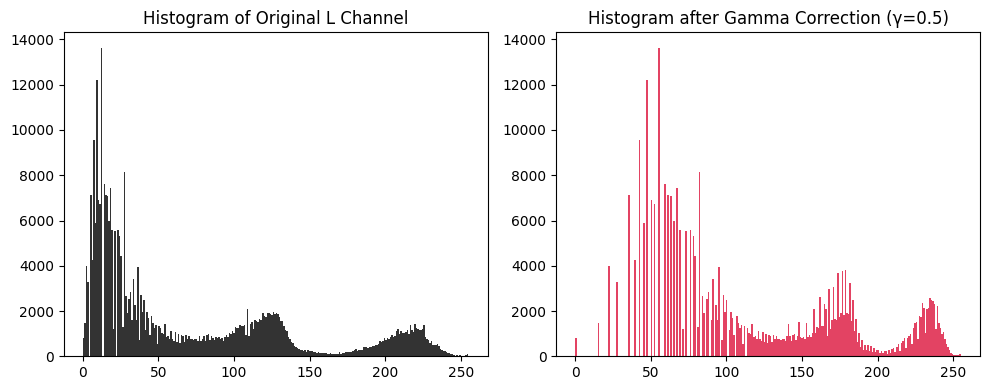

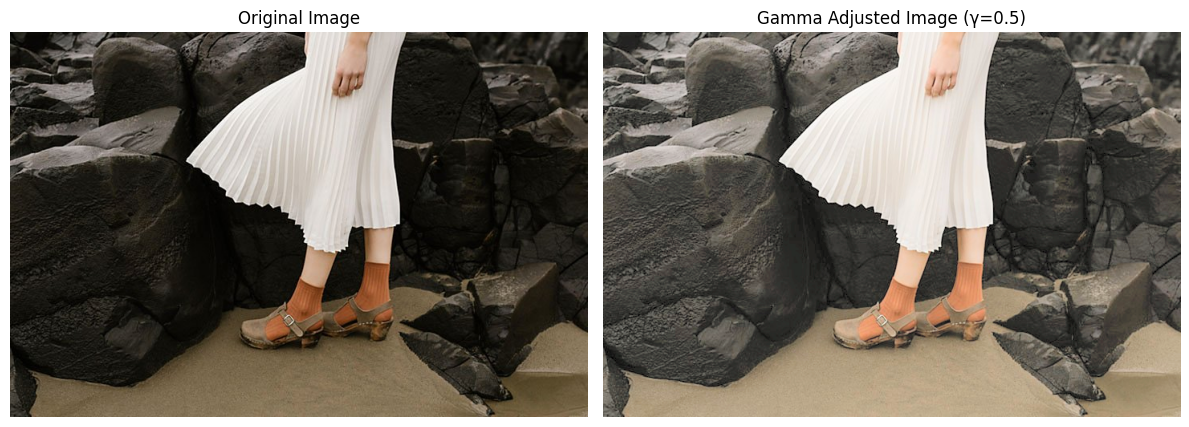

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "highlights_and_shadows.jpg"
original_bgr = cv2.imread(image_path)

lab_img = cv2.cvtColor(original_bgr, cv2.COLOR_BGR2Lab)
l_channel, a_channel, b_channel = cv2.split(lab_img)

gamma_value = 0.5  
l_normalized = l_channel.astype("float32") / 255.0
l_corrected = np.power(l_normalized, gamma_value) * 255
l_corrected = l_corrected.astype("uint8")

lab_modified = cv2.merge([l_corrected, a_channel, b_channel])
gamma_corrected_bgr = cv2.cvtColor(lab_modified, cv2.COLOR_Lab2BGR)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(l_channel.flatten(), bins=256, color="black", alpha=0.8)
plt.title("Histogram of Original L Channel")

plt.subplot(1,2,2)
plt.hist(l_corrected.flatten(), bins=256, color="crimson", alpha=0.8)
plt.title(f"Histogram after Gamma Correction (γ={gamma_value})")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(original_bgr, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(gamma_corrected_bgr, cv2.COLOR_BGR2RGB))
plt.title(f"Gamma Adjusted Image (γ={gamma_value})")
plt.axis("off")

plt.tight_layout()
plt.show()
